In this tutorial consider the CIFAR dataset. Use the initial code given below and perform the classification using CNN and HoG based features.

In [ ]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Uncomment the next line if you run on Colab
#!pip install --quiet openml

In [ ]:
%matplotlib inline
import openml as oml
import matplotlib.pyplot as plt

In [ ]:
# Download CIFAR data. Takes a while the first time.
# This version returns 3x32x32 resolution images.
# If you feel like it, repeat the exercises with the 96x96x3 resolution version by using ID 41103
cifar = oml.datasets.get_dataset(40926)
X, y, _, _ = cifar.get_data(target=cifar.default_target_attribute, dataset_format='array');
cifar_classes = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
                 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

In [ ]:
# The dataset (40926) is in a weird 3x32x32 format, we need to reshape and transpose
Xr = X.reshape((len(X),3,32,32)).transpose(0,2,3,1)

In [ ]:
Xr

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

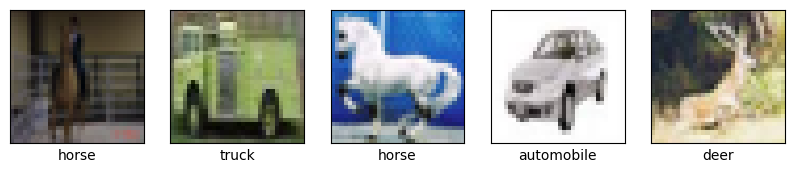

In [ ]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,len(Xr))
    # The data is stored in a 3x32x32 format, so we need to transpose it
    axes[i].imshow(Xr[n]/255)
    axes[i].set_xlabel((cifar_classes[int(y[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

## Task 1: CNN based Classification
* Split the data into 80% training and 20% validation sets
* Normalize the data to [0,1]
* Build a ConvNet with 3 convolutional layers interspersed with MaxPooling layers, and one dense layer.
    * Use at least 32 3x3 filters in the first layer and ReLU activation.
    * Otherwise, make rational design choices or experiment a bit to see what works.
* You should at least get 60% accuracy.
* For training, you can try 20-50 epochs, but feel free to explore this as well

 **Spliting  the data into 80% training and 20% validation **

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(Xr, y, test_size=0.2, random_state=42)
X_train.shape

(16000, 32, 32, 3)

In [ ]:
y_train.shape

(16000,)

In [ ]:
#normalizing the data
X_train = X_train / 255.0
X_val = X_val / 255.0

In [ ]:
# Build the ConvNet model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 [==============================] - 5s 5ms/step - loss: 1.7534 - accuracy: 0.3464 - val_loss: 1.5242 - val_accuracy: 0.4540
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 1.3907 - accuracy: 0.4971 - val_loss: 1.4140 - val_accuracy: 0.4927
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 1.2357 - accuracy: 0.5603 - val_loss: 1.3377 - val_accuracy: 0.5185
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 1.1289 - accuracy: 0.5969 - val_loss: 1.2053 - val_accuracy: 0.5720
Epoch 5/50
500/500 [==============================] - 3s 7ms/step - loss: 1.0311 - accuracy: 0.6363 - val_loss: 1.2326 - val_accuracy: 0.5690
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.9418 - accuracy: 0.6641 - val_loss: 1.1241 - val_accuracy: 0.6093
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.8618 - accuracy: 0.6958 - val_loss: 1.1473 - val_accuracy: 0.6090
Epoch 8/50
500/50

In [ ]:
...
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


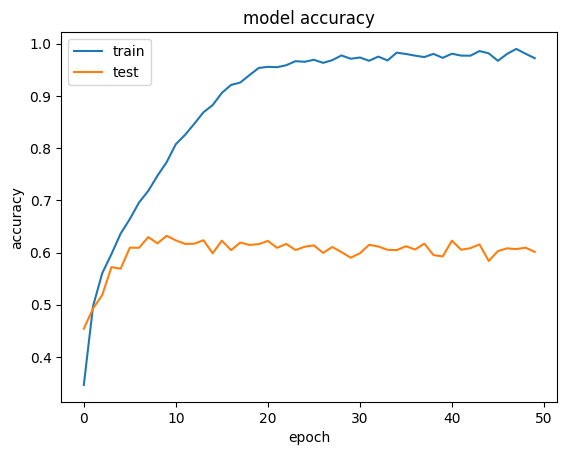

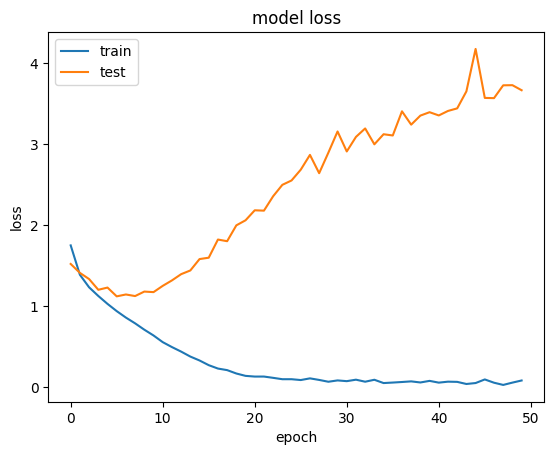

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc*100)

Validation Loss: 3.669343948364258
Validation Accuracy: 60.12499928474426


In [ ]:
# Get the model's predictions on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)

# Calculate the accuracy by comparing the predicted labels with the true labels
val_accuracy = np.mean(y_val_pred_labels == y_val) * 100

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)

125/125 [==============================] - 0s 2ms/step
Validation Accuracy: 48.55


## Task 2: HOG based Classification
* Use the same data split as mentioned above and extract the HOG features from the training and testing split and classify the HOG features using SVM classifier.
* Compare the accuracy with CNN features and explain which technique outperforms.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(Xr, y, test_size=0.2, random_state=42)


In [ ]:
from skimage.feature import hog

# Extract HOG features from the training set
X_train_hog = []
for image in X_train:
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    X_train_hog.append(features)
X_train_hog = np.array(X_train_hog)



<ipython-input-54-91c041c72d67>:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)


In [ ]:
# Extract HOG features from the validation set
X_val_hog = []
for image in X_val:
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    X_val_hog.append(features)
X_val_hog = np.array(X_val_hog)


<ipython-input-55-53234980e333>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)


In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_hog, y_train)
accuracy_svm = svm_classifier.score(X_val_hog, y_val)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.5995


In [ ]:
results=pd.DataFrame({'Model':['CNN','SVM'],
                     'Accuracy Score':[accuracy_cnn,accuracy_svm]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
CNN,0.60125
SVM,0.59950


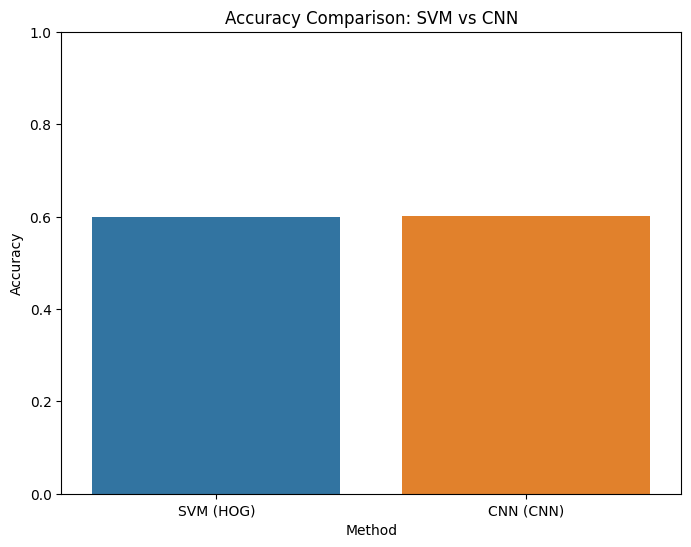

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of method names and their corresponding accuracies
methods = ['SVM (HOG)', 'CNN (CNN)']
accuracies = [accuracy_svm, accuracy_cnn]

# Create a bar plot to visualize the accuracies
plt.figure(figsize=(8, 6))
sns.barplot(x=methods, y=accuracies)
plt.title('Accuracy Comparison: SVM vs CNN')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set the y-axis limit from 0 to 1
plt.show()
